In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
def funct(y,t,pars):
    x = y[0]
    a = y[1]
    dxdt = x*(1 - x)*(pars['e']*pars['p']*pars['cd']*(1 - pars['d']*x) - pars['cn']*(1 - a))
    dadt = pars['gamma']*a*(1 - a)*(2*x - 1)
    dydt = np.array([dxdt,dadt])
    return dydt

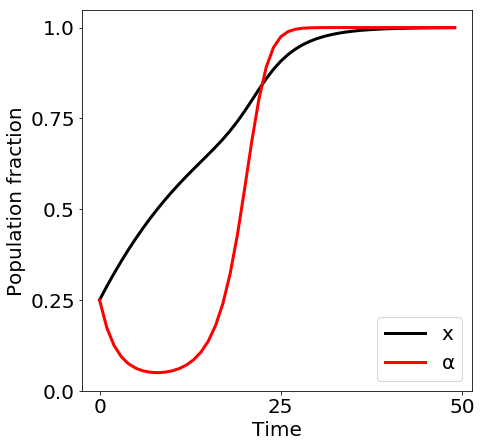

In [3]:
# Parameters
pars={} #initiate parameter dictionary
pars['p']=0.5
pars['cd']=1
pars['e']=0.9
pars['d']=0.5
pars['cn']=0.25
pars['gamma']=1

# Initial conditions
c0 =  0.25   #initial fraction of cooperators 
a0 =  0.25   #initial alpha mean 
y0 = np.array([c0,a0])
t = np.arange(50)

# Simulate
int_y = integrate.odeint(funct,y0,t,args=(pars,))

# Visualize
fig1,ax = plt.figure(figsize=(7, 7)), plt.axes()
plt.plot(t,int_y[:,0],linewidth=3,color='k')
plt.plot(t,int_y[:,1],linewidth=3,color='r')
plt.xlabel('Time',fontsize=20)
plt.ylabel('Population fraction',fontsize=20)
ax.tick_params(labelsize=15)
ax.set_xticks(np.linspace(0,50,3))
ax.set_xticklabels(np.linspace(0,50,3).astype(int),fontsize=20) 
ax.set_yticks(np.linspace(0,1,5))
ax.set_yticklabels(np.linspace(0,1,5).round(decimals=2),fontsize=20) 
plt.legend(['x','α'],fontsize=20,loc='lower right')
plt.show()

In [4]:
int_y[49,0]

0.999576523596198

In [5]:
# Parameters
pars={} #initiate parameter dictionary
pars['p']=0.3
pars['cd']=1
pars['e']=0.9
pars['d']=0.5
pars['cn']=0.25
pars['gamma']=1

cum_coop=0
N=40
vec=np.linspace(0,1,N)
t = np.arange(70)

# Initial conditions
for c0 in vec:
    for a0 in vec:
        y0 = np.array([c0,a0])
        int_y = integrate.odeint(funct,y0,t,args=(pars,))
        cum_coop = cum_coop + int_y[len(t)-1,0]

coop_fraction = cum_coop/N**2
coop_fraction

0.6734491217324226

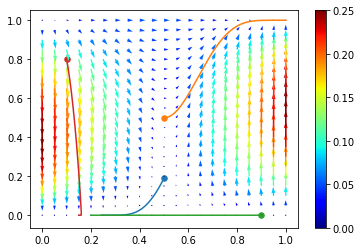

In [6]:
# Initial conditions
x0 = [[0.5-0.0001, -0.0001+(pars['cn']-pars['e']*pars['p']*pars['cd']*(1-pars['d']/2))/(pars['cn'])],[0.5, 0.5],[0.9, 0],[0.1, 0.8]]
#x0 = [[1, 0.8],[0.5, 0.5],[0.9, 0],[0.1, 0.8]]
t = np.linspace(0,100,101000)

# Simulate
for i in range(4):
    int_y = integrate.odeint(funct,x0[i],t,args=(pars,))
    plt.plot(int_y[:,0],int_y[:,1])
    plt.scatter(int_y[0,0],int_y[0,1] , s = 30)
    
# Overlay the arrows
xvec = np.arange(0,1.05,0.05)
avec = np.arange(0,1.05,0.05)

# Define rate of change
xf = lambda pars,x,a : x*(1-x)*(pars['e']*pars['p']*pars['cd']*(1-pars['d']*x) - pars['cn']*(1-a))
af = lambda pars,x,a : a*(1-a)*(2*x-1)

MM,PP = np.meshgrid(xvec,avec)
M = np.sqrt(xf(pars,MM,PP)*xf(pars,MM,PP)+af(pars,MM,PP)*af(pars,MM,PP))
qq = plt.quiver(MM,PP,xf(pars,MM,PP),af(pars,MM,PP),M,cmap=plt.cm.jet,scale=2.4,width=0.005)
plt.colorbar(qq, cmap=plt.cm.jet)

plt.show()

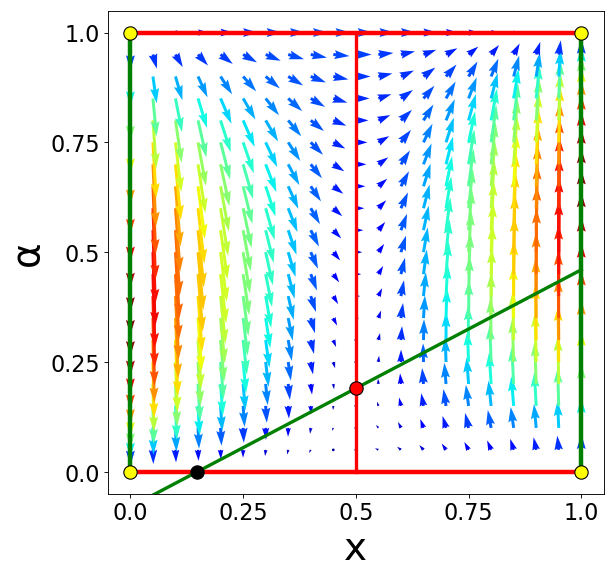

In [25]:
pars['p']=0.3
pars['cn']=0.25

xvec = np.arange(0,1.05,0.05)
avec = np.arange(0,1.05,0.05)

x_null1, x_null2, x_null3 = 0,1,1/2
a_null1,a_null2 = 0,1
a_null3 = (pars['cn']-pars['e']*pars['p']*pars['cd']*(1-pars['d']*xvec))/(pars['cn'])

# Plot
fig,ax = plt.figure(figsize=(8, 8), dpi=80), plt.axes()
plt.plot(x_null1*np.ones(np.shape(avec)), avec, 'g', linewidth=4)
plt.plot(xvec, a_null1*np.ones(np.shape(xvec)), 'r', linewidth=4)
plt.plot(x_null2*np.ones(np.shape(avec)), avec, 'g', linewidth=4)
plt.plot(xvec, a_null2*np.ones(np.shape(xvec)), 'r', linewidth=4)
plt.plot(x_null3*np.ones(np.shape(avec)), avec, 'r', linewidth=3)
ax.set_xlim([(pars['e']*pars['p']*pars['cd']-pars['cn'])/(pars['e']*pars['p']*pars['cd']*pars['d']),1])
plt.plot(xvec, a_null3, 'g', linewidth=3)

# Label 
#plt.legend([r'$\dfrac{dx}{dt} = 0$',r'$\dfrac{dα}{dt} = 0$'],fontsize=25,loc='upper left')
plt.xlim(0,1)
plt.ylim(0,1)
ax.set_xlim([0,1])
ax.set_ylim([0,1])
plt.xlabel('x',fontsize=35)
plt.ylabel('α',fontsize=35)

# Define rate of change
xf = lambda pars,x,a : x*(1-x)*(pars['e']*pars['p']*pars['cd']*(1-pars['d']*x) - pars['cn']*(1-a))
af = lambda pars,x,a : pars['gamma']*a*(1-a)*(2*x-1)

# Overlay the arrows
MM,PP = np.meshgrid(xvec,avec)
M= np.sqrt(xf(pars,MM,PP)*xf(pars,MM,PP)+af(pars,MM,PP)*af(pars,MM,PP))
qq=plt.quiver(MM,PP,xf(pars,MM,PP),af(pars,MM,PP),M,cmap=plt.cm.jet,scale=1.5,width=0.006)
#plt.colorbar(qq, cmap=plt.cm.jet)
ax.set_xticks(np.linspace(0,1,5)),ax.set_xticklabels(np.linspace(0,1,5).round(decimals=2),size=20),ax.set_yticks(np.linspace(0,1,5)),ax.set_yticklabels(np.linspace(0,1,5).round(decimals=3),size=20)
ax.plot(0,0, marker="o", markersize=12, markeredgecolor="k", markerfacecolor="yellow")
ax.plot(0,1, marker="o", markersize=12, markeredgecolor="k", markerfacecolor="yellow")
ax.plot(1,0, marker="o", markersize=12, markeredgecolor="k", markerfacecolor="yellow")
ax.plot(1,1, marker="o", markersize=12, markeredgecolor="k", markerfacecolor="yellow")
ax.plot(0.5,(pars['cn']-pars['e']*pars['p']*pars['cd']*(1-pars['d']/2))/(pars['cn']), marker="o", markersize=12, markeredgecolor="k", markerfacecolor="r")
ax.plot((pars['e']*pars['p']*pars['cd']-pars['cn'])/(pars['e']*pars['p']*pars['cd']*pars['d']),0, marker="o", markersize=12, markeredgecolor="k", markerfacecolor="k")
ax.set_xlim([-0.05,1.05])
ax.set_ylim([-0.05,1.05])
plt.show()

In [8]:
#not working

pars={} #initiate parameter dictionary
pars['cd']=1
pars['e']=0.9
pars['d']=0.5
pars['cn']=0.65
pars['gamma']=1



for pars['p'] in np.linspace(0,10,11):
    xvec = np.arange(0,1.05,0.05)
    avec = np.arange(0,1.05,0.05)
    xf = lambda pars,x,a : 0
    af = lambda pars,x,a : 0
    x=0
    a=0
    x_null1, x_null2, x_null3 = 0,1,1/2
    a_null1,a_null2 = 0,1
    a_null3 = (pars['cn']-pars['e']*pars['p']*pars['cd']*(1-pars['d']*xvec))/(pars['cn'])

    # Plot
    fig=plt.figure()
    plt.plot(x_null1*np.ones(np.shape(avec)), avec, 'g', linewidth=5)
    plt.plot(xvec, a_null1*np.ones(np.shape(xvec)), 'r', linewidth=5)
    plt.plot(x_null2*np.ones(np.shape(avec)), avec, 'g', linewidth=5)
    plt.plot(xvec, a_null2*np.ones(np.shape(xvec)), 'r', linewidth=5)
    plt.plot(x_null3*np.ones(np.shape(avec)), avec, 'r', linewidth=3)
    plt.plot(xvec, a_null3*np.ones(np.shape(xvec)), 'g', linewidth=3)

    # Label 
    plt.legend([r'$\frac{dx}{dt} = 0$',r'$\frac{dα}{dt} = 0$'],fontsize=12)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('x',fontsize=15)
    plt.ylabel('α',fontsize=15)

    # Define rate of change
    xf = lambda pars,x,a : x*(1-x)*(pars['e']*pars['p']*pars['cd']*(1-pars['d']*x) - pars['cn']*(1-a))
    af = lambda pars,x,a : pars['gamma']*a*(1-a)*(2*x-1)

    # Overlay the arrows
    MM,PP = np.meshgrid(xvec,avec)
    M= np.sqrt(xf(pars,MM,PP)*xf(pars,MM,PP)+af(pars,MM,PP)*af(pars,MM,PP))
    qq=plt.quiver(MM,PP,xf(pars,MM,PP),af(pars,MM,PP),M,cmap=plt.cm.jet,scale=2,width=0.006)
    plt.colorbar(qq, cmap=plt.cm.jet)
    
    plt.savefig(r'C:\Users\Sara\Documents\Madrid\vid\fig_'+ str(pars['p']) +".png", format="PNG")
    plt.cla()
    plt.close()

In [9]:
import cv2

img_array = []

for x in np.linspace(0,10,11):
    path = r'C:\Users\Sara\Documents\Madrid\vid\fig_%d.0.png' %x
    img = cv2.imread(path)
    img_array.append(img)
    
a= cv2.imread(r'C:\Users\Sara\Documents\Madrid\vid\fig_0.0.png')
height, width = a.shape[:2]

# choose codec according to format needed
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('vidd.mp4', fourcc, 2,  (width, height))

# merge frames in a video
for i in range(len(img_array)):
    video.write(img_array[i])  

cv2.waitKey()
video.release()
cv2.destroyAllWindows()